# Tax Risk case - NBIM ESG Analytics
In this file we are exploring the data in the file "ESG Analytics - Tax risk case data.xlsx". Our goal is the following:
1. Identify which sector you think is most exposed to tax risk and explain your rationale.
2. In the sector you have chosen, develop a tax risk scoring system that can rank companies within the sector from low to high tax risk (i.e., high tax risk means more exposure to zero-tax jurisdictions).
3. How would you convince an equity portfolio manager at NBIM that he/she should consider your tax score in their investment decision to buy or sell shares in a company?

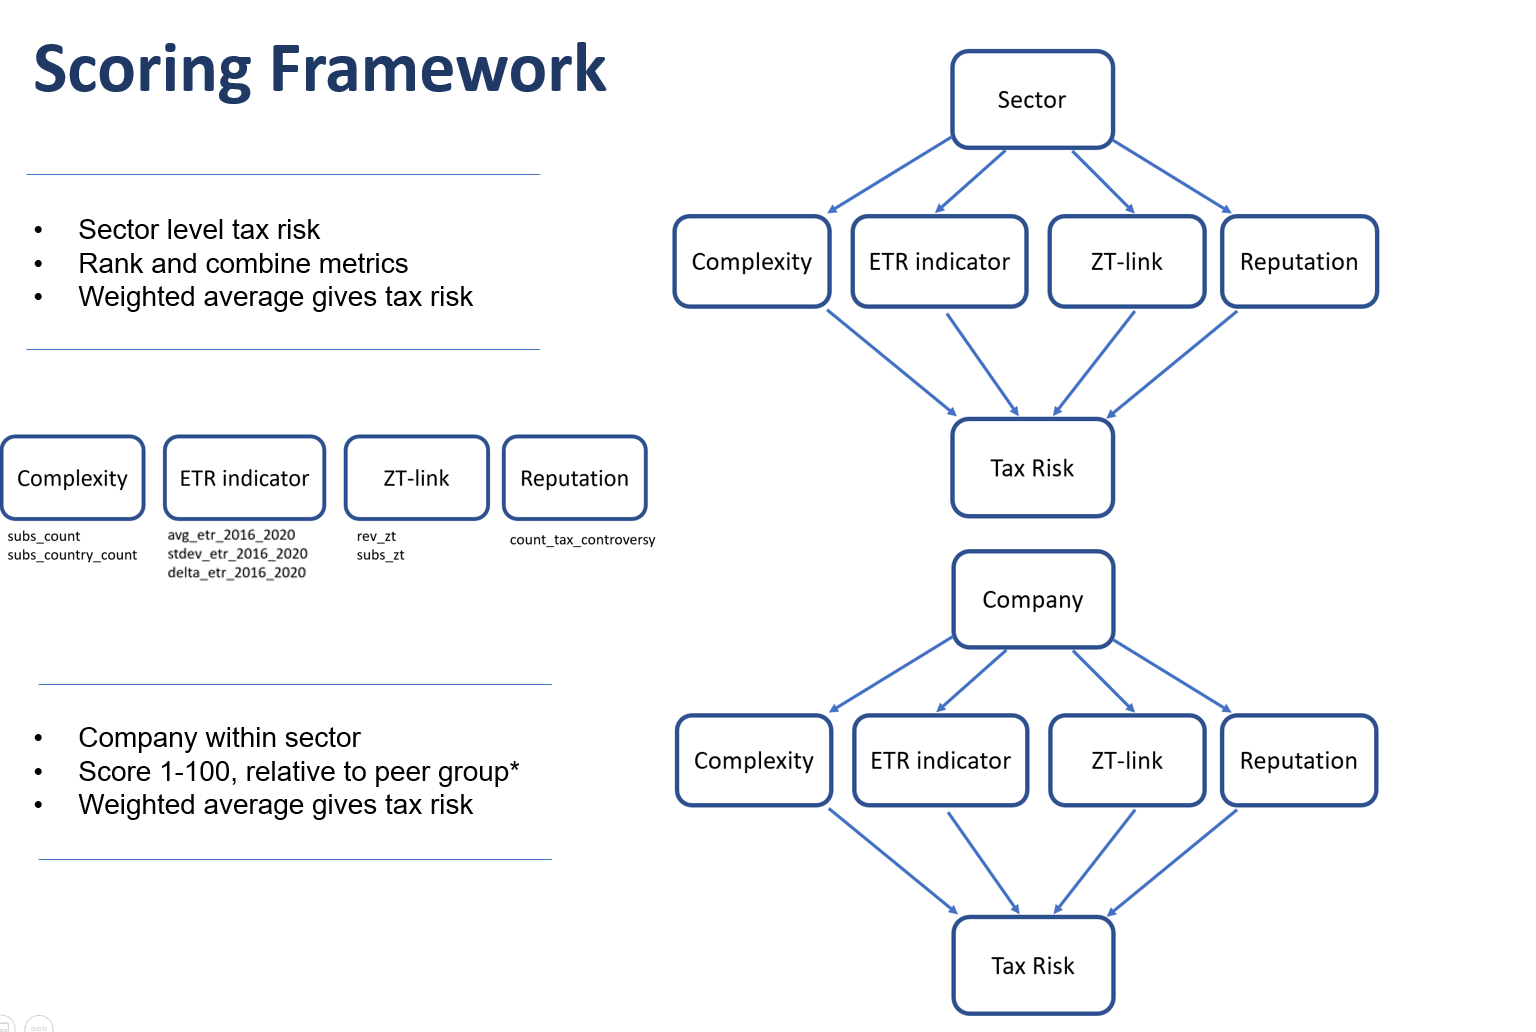

In [496]:
from IPython.display import Image
Image(filename='Scoring framework.PNG')

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_excel('ESG Analytics - Tax risk case data.xlsx', sheet_name = 'Dataset')

# First steps - looking at the data

In [3]:
df.head()

,organisation_code,country_of_incorporation,sector,subsector,mcap_nok,rev_nonincorp,rev_zt,subs_country_count,subs_count,avg_sector_subs_count,subs_zt,subs_zt_count,subs_zt_sector_avg,2020_etr,avg_etr_2016_2020,stdev_etr_2016_2020,delta_etr_2016_2020,sector_avg_etr_2016_2020,count_tax_controversy
0,148145,Bermuda,Financials,Banks,1.614332e+10,52.391773,76.832289,13.0,91.0,452.549037,Yes,37,14.081953,1.589625,0.558060,0.850006,0.966495,23.720833,NaN
1,942223,Switzerland,Financials,Asset Managers and Custodians,4.322148e+11,99.915761,48.979152,24.0,609.0,452.549037,Yes,16,14.081953,13.341955,12.426958,1.190929,2.376466,23.720833,0.0
2,102259,United States,Telecommunications,Telecommunications Services,6.008532e+09,73.156744,42.560447,9.0,73.0,103.183594,Yes,14,2.270270,861.290323,201.564510,369.684277,814.655686,11.555537,0.0
3,103810,United States,Financials,Asset Managers and Custodians,8.133451e+09,43.998991,42.116051,9.0,1096.0,452.549037,Yes,35,14.081953,-1.229345,1769.776993,3882.954825,-54.155806,23.720833,0.0
4,1704420,Thailand,Technology,Computer Hardware,4.184088e+09,52.671237,33.618329,10.0,23.0,58.097653,Yes,1,1.107376,51.318007,26.785589,16.406446,34.567125,41.124792,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9281 entries, 0 to 9280
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   organisation_code         9281 non-null   int64  
 1   country_of_incorporation  9281 non-null   object 
 2   sector                    9281 non-null   object 
 3   subsector                 9281 non-null   object 
 4   mcap_nok                  9253 non-null   float64
 5   rev_nonincorp             8621 non-null   float64
 6   rev_zt                    8621 non-null   float64
 7   subs_country_count        9217 non-null   float64
 8   subs_count                9217 non-null   float64
 9   avg_sector_subs_count     9281 non-null   float64
 10  subs_zt                   9281 non-null   object 
 11  subs_zt_count             9281 non-null   int64  
 12  subs_zt_sector_avg        9281 non-null   float64
 13  2020_etr                  8496 non-null   float64
 14  avg_etr_

We observe over 2k NaN values count_tax_controversy, and also 600-800 NaNs for rev_nonincorp, rev_zt, 2020_etr, avg_etr_2016_2020, stdev_etr_2016_2020, delta_etr_2016_2020.

In [5]:
df.describe()

,organisation_code,mcap_nok,rev_nonincorp,rev_zt,subs_country_count,subs_count,avg_sector_subs_count,subs_zt_count,subs_zt_sector_avg,2020_etr,avg_etr_2016_2020,stdev_etr_2016_2020,delta_etr_2016_2020,sector_avg_etr_2016_2020,count_tax_controversy
count,9.281000e+03,9.253000e+03,8621.000000,8621.000000,9217.000000,9217.000000,9281.000000,9281.000000,9281.000000,8496.000000,8477.000000,8477.000000,8482.000000,9281.000000,6891.000000
mean,1.375418e+07,5.487810e+13,45.618223,0.072954,10.268417,131.291744,131.074495,2.790863,2.790863,40.546005,22.519767,63.551662,18.289443,22.523740,0.052097
std,2.011478e+07,4.849169e+15,43.378209,1.385409,14.407285,530.203491,123.745012,24.303618,4.276448,1544.870611,410.188642,916.051566,1560.285793,10.424744,0.389316
min,1.000010e+05,7.742400e+01,0.000000,0.000000,1.000000,1.000000,5.714286,0.000000,0.035714,-8300.000000,-18836.098519,0.000000,-8700.740659,5.290148,0.000000
25%,1.270050e+05,6.725367e+09,0.000000,0.000000,2.000000,8.000000,65.566845,0.000000,1.079951,8.719310,12.321380,2.800993,-10.811612,12.430052,0.000000
50%,9.818110e+05,1.991554e+10,38.925902,0.000000,4.000000,26.000000,79.776675,0.000000,1.107376,21.472239,22.797807,7.200654,-1.381406,19.827603,0.000000
75%,1.852140e+07,6.461427e+10,94.073863,0.000000,12.000000,90.000000,103.183594,0.000000,2.270270,29.898697,30.186922,20.148886,4.614207,31.912731,0.000000
max,6.967754e+07,4.661024e+17,1280.598690,76.832289,120.000000,16919.000000,452.549037,940.000000,14.081953,138325.000000,27680.850629,61851.960886,138315.824261,41.124792,12.000000


We observe mostly 0's in rev_zt, subs_zt_count and count_tax_controversy. We also observe a mcap_nok of 4.661024e+17, which is way to big (AAPL max was about 2.7e+13 mcap_nok). rev_nonincorp (revenues from outside of country_of_incorporation) in pct of 1280.598690 must also be wrong.

In [6]:
df.country_of_incorporation.value_counts()

United States     1944
Japan             1507
South Korea        522
Taiwan             458
Cayman Islands     347
                  ... 
Malta                2
Liberia              1
Iceland              1
Unknown              1
Gibraltar            1
Name: country_of_incorporation, Length: 80, dtype: int64

# Cleaning data: Detecting outliers - What makes sense?

In [7]:
# rev_nonincorp should not be above 100, but some rounding gives values s.a. 100.00001
# mcap_nok should not exceed 2.7e+13 (AAPL max)
df[(df.rev_nonincorp>100.1) | (df.mcap_nok>2.7e+13)] # 27 companies
df = df[((df.rev_nonincorp<100.1) | (df.rev_nonincorp.isna())) & ((df.mcap_nok<2.7e+13)| (df.mcap_nok.isna()))]

# Cleaning data: Datatypes

In [8]:
# subs_zt should be 1 if yes, and 0 if no
df = df.replace(["Yes","No"],[1,0])

# Cleaning data: Handeling missing values

In [9]:
# count_tax_controversy values are mostly Zero
df.count_tax_controversy.value_counts(dropna=False)

0.0     6662
NaN     2385
1.0      141
2.0       31
3.0       16
5.0        8
4.0        5
6.0        3
8.0        1
7.0        1
12.0       1
Name: count_tax_controversy, dtype: int64

In [10]:
# Let's replace NaNs in count_tax_controversy with 0's
df.count_tax_controversy = df.count_tax_controversy.fillna(0)

# Getting an overview - basic plots

<AxesSubplot:title={'center':'N companies per sector'}>

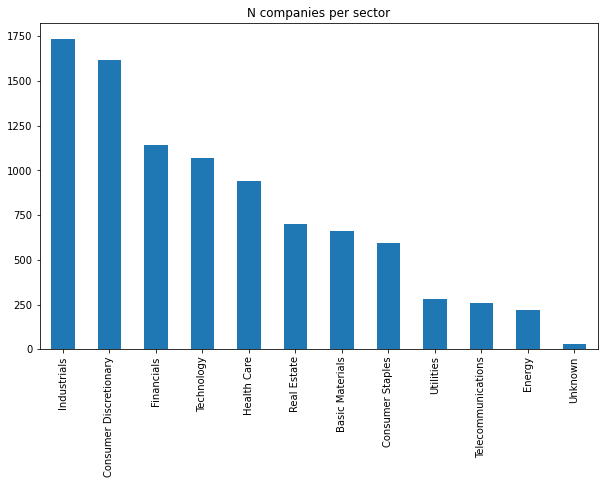

In [11]:
# Sector count of companies
df.sector.value_counts().plot(figsize = (10,6), kind = 'bar', title = "N companies per sector")

<AxesSubplot:title={'center':'Total Mcap in BNOK per sector'}, xlabel='sector', ylabel='BNOK'>

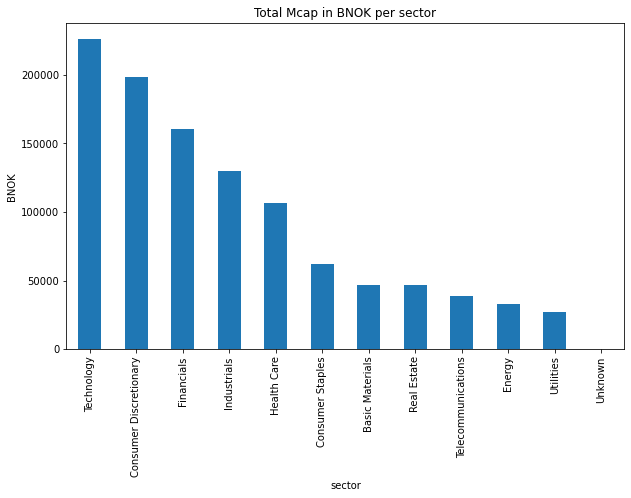

In [12]:
# Sector total mcap_nok
(df.groupby("sector").mcap_nok.sum()/1000000000).sort_values(ascending=False).plot(figsize = (10,6), kind = 'bar', title = "Total Mcap in BNOK per sector",ylabel="BNOK")

In [13]:
# Sanity check on total Mcap (NBIM should be about 1.5% of total market)
1.25e+13/df.mcap_nok.sum()

0.011596979523676967

<AxesSubplot:title={'center':'Distribution of revenues outside country of incorporation'}, ylabel='Frequency'>

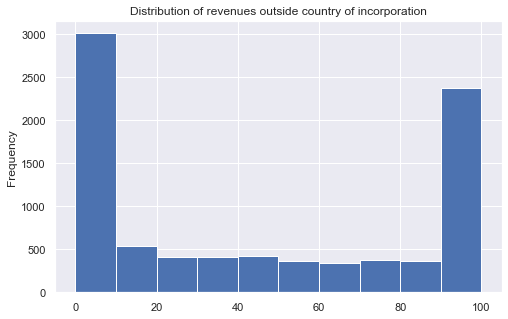

In [457]:
# Distribution of revenues outside country_of_incorporation
df.rev_nonincorp.plot.hist(figsize=(8, 5), title = "Distribution of revenues outside country of incorporation") # buckets?

# Geographical break down
Let's look at how values are distributed across continents, but also take a closer look at companies with country_of_incorporation in Tax Heavens (as according to Oxfam_Corporate_Tax_Havens_list).

In [30]:
# File to map country to continent
df_country_to_continent = pd.read_csv("Country_to_Continent.csv")

In [31]:
# Merging on country_of_incorporation=Country
df = df.merge(df_country_to_continent, left_on='country_of_incorporation', right_on='Country')

<AxesSubplot:xlabel='Continent'>

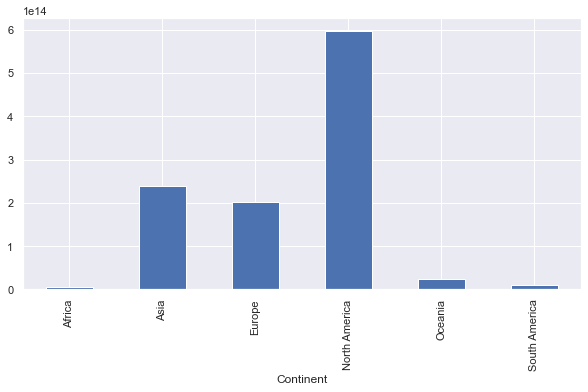

In [461]:
# Market cap distribution
df.groupby("Continent").mcap_nok.sum().plot.bar(x="Continent",y="mcap_nok")

<AxesSubplot:xlabel='Continent'>

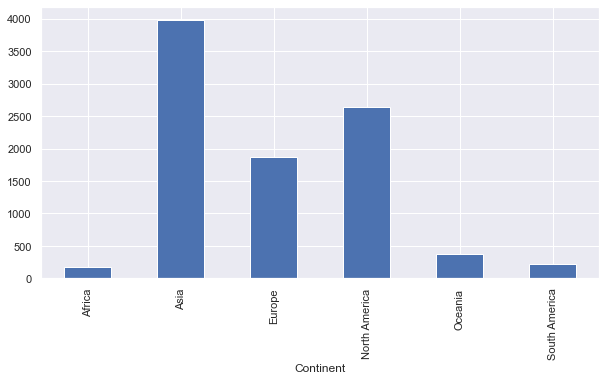

In [460]:
# Number of companies in each continent
df.groupby("Continent").size().plot.bar(x="Continent",y="number of companies")

## Companies in Tax Havens
Let's look at companies that have a tax haven as country of incorporation, as per the Oxfam Corporate Tax Havens list.

In [34]:
# Resource: https://www.worlddata.info/tax-havens.php 
Oxfam_Corporate_Tax_Havens_list = ['Mauritius', 'Albania', 'Faroe Islands', 'Greenland', 'Niue', 'Cayman Islands', 'Vanuatu', 'Hong Kong', 'Singapore', 'Luxembourg', 'Netherlands', 'British Virgin Islands', 'United Arab Emirates', 'Malta', 'Bahamas', 'Ireland', 'Bermuda', 'Bahrain', 'Virgin Islands', 'Antigua and Barbuda', 'Trinidad and Tobago', 'Guam', 'Palau', 'Switzerland', 'Taiwan', 'Jersey', 'Canada', 'Gibraltar', 'Marshall Islands', 'Anguilla', 'Curacao', 'Aruba', 'Montenegro', 'Nauru', 'Cook Islands', 'Bosnia and Herzegovina', 'Oman', 'Serbia']

In [35]:
df["zt_country"] = df["country_of_incorporation"].isin(Oxfam_Corporate_Tax_Havens_list).astype(int)

<AxesSubplot:xlabel='zt_country'>

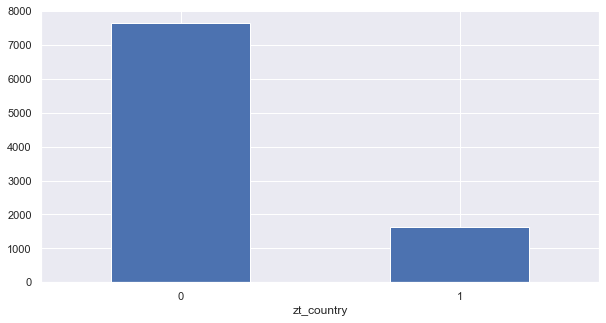

In [458]:
# Number of companies in a zt_country vs a non zt_country
df.groupby("zt_country").size().plot.bar(x="zt_country",y="number of companies", rot=0)

<AxesSubplot:xlabel='zt_country'>

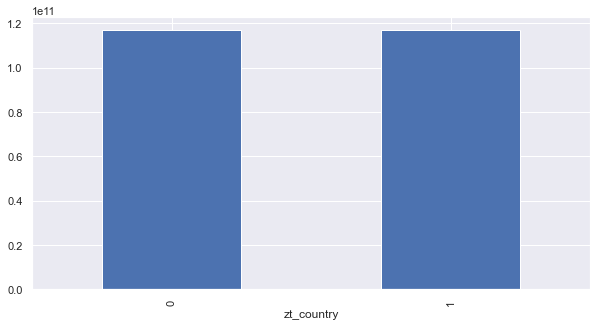

In [459]:
# Market cap average
df.groupby("zt_country").mcap_nok.mean().plot.bar(x="zt_country")

<AxesSubplot:xlabel='zt_country'>

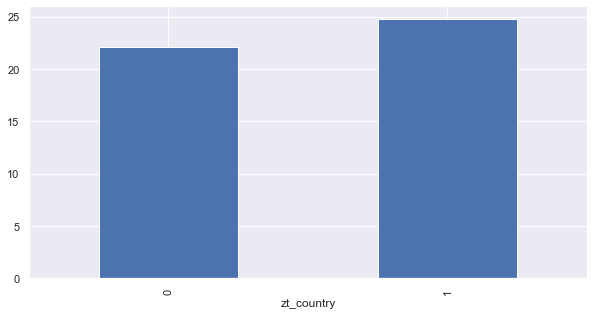

In [462]:
# Looking at ETR (avg_etr_2016_2020 average)
df.groupby("zt_country").avg_etr_2016_2020.mean().plot.bar(x="zt_country")

<AxesSubplot:xlabel='zt_country'>

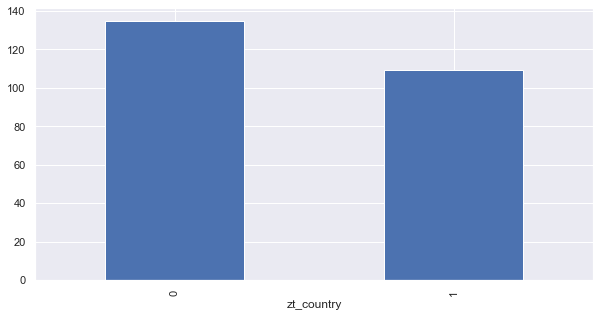

In [463]:
# Looking at complexity
df.groupby("zt_country").subs_count.mean().plot.bar(x="zt_country")

<AxesSubplot:xlabel='zt_country'>

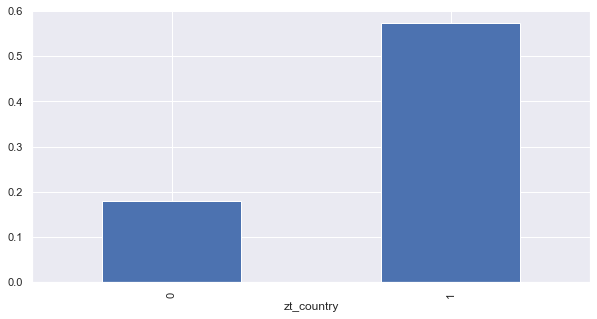

In [464]:
# Looking at ZT-link
df.groupby("zt_country").subs_zt.mean().plot.bar(x="zt_country")

<AxesSubplot:xlabel='zt_country'>

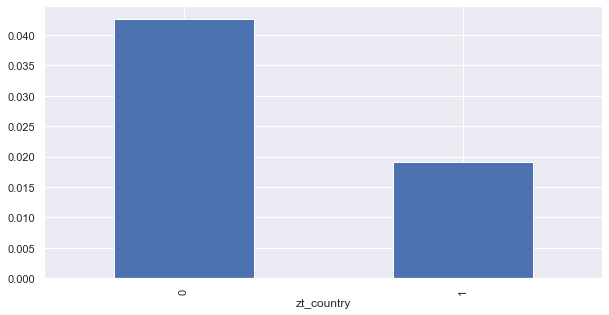

In [465]:
# Controversies
df.groupby("zt_country").count_tax_controversy.mean().plot.bar(x="zt_country")

Conlusion: Companies with count_tax_controversy as a zt country have a significantly higher portion of companies with at least subsidiary in a zero-tax jurisdiction, which is to be expected. However, there does not seem to be other indicators for tax risk that suggest that these companies are riskier.

# Sector with highest Tax Risk Exposure
Sector with
1. High degree of complexity
2. Close link with Zero-Tax jurisdictions
3. Low, volitile, declining efficient tax rate
4. Controversies frequent

In [39]:
# 1. Complexity -> high number of subs and high number countries with of subs
# 2. ZT link -> has subs in zt_country (subs_zt=1) and has high revenues from zt_country (rev_zt high)
# 3. ETR -> sector_avg_etr_2016_2020 low (to keep it simple)

df_sector = df.groupby("sector").agg({'subs_country_count': 'mean', 'avg_sector_subs_count': 'first',
                         'subs_zt':'mean', 'rev_zt': 'mean',
                         'sector_avg_etr_2016_2020':'first', '2020_etr':'mean','delta_etr_2016_2020':'mean','stdev_etr_2016_2020':'mean',
                         'count_tax_controversy':'mean'})

In [40]:
df_sector["subs_per_country"] = df_sector["avg_sector_subs_count"]/df_sector["subs_country_count"]
# df_sector[["subs_per_country", "avg_sector_subs_count"]].corr() # -> compexity grows "exponentially"
# df_sector.corr()

df_sector = df_sector[['subs_country_count', 'avg_sector_subs_count', 'subs_per_country', 'subs_zt', 'rev_zt',
       'sector_avg_etr_2016_2020', '2020_etr', 'delta_etr_2016_2020',
       'stdev_etr_2016_2020', 'count_tax_controversy']]

df_sector = df_sector.drop(labels="Unknown", axis=0)

In [41]:
df_sector.round(2).transpose()

sector,Basic Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Real Estate,Technology,Telecommunications,Utilities
subs_country_count,11.22,9.82,9.82,12.29,9.68,9.08,13.87,3.97,11.11,11.88,5.73
avg_sector_subs_count,65.17,79.78,66.35,106.40,452.55,65.57,96.35,165.91,58.10,103.18,92.51
subs_per_country,5.81,8.13,6.76,8.66,46.77,7.22,6.95,41.76,5.23,8.69,16.14
subs_zt,0.21,0.23,0.18,0.34,0.42,0.20,0.20,0.26,0.28,0.24,0.18
rev_zt,0.03,0.03,0.02,0.02,0.31,0.05,0.03,0.00,0.06,0.22,0.01
sector_avg_etr_2016_2020,19.83,12.43,28.47,12.46,23.72,17.20,31.91,5.29,41.12,11.56,19.68
2020_etr,43.54,42.35,25.76,18.56,18.43,18.92,28.35,17.19,144.49,26.68,6.73
delta_etr_2016_2020,0.41,25.76,9.42,-1.07,-7.67,0.90,5.22,-1.85,125.44,-0.90,-18.75
stdev_etr_2016_2020,94.39,90.15,31.27,51.35,34.01,41.74,48.00,48.03,119.12,74.73,34.53
count_tax_controversy,0.07,0.04,0.04,0.10,0.04,0.03,0.03,0.02,0.02,0.08,0.03


In [42]:
# Desciding if a factor has a higher value means greater risk (False), og lesser risk (True)
ascending_bools = [False, False, False, False, False, True, True, True, False, False]

# Ranking each factor among the sectors
df_sector_rank = pd.DataFrame([df_sector[col].rank(ascending=ascending_bools[i]) for i, col in enumerate(df_sector)]).transpose()

In [470]:
# Creating a combined score for each sector as a weighted average of each factor rank
df_sector_rank["combined_score"] = (df_sector_rank['subs_country_count']+df_sector_rank['avg_sector_subs_count'])/2+(df_sector_rank['subs_zt']+df_sector_rank['rev_zt'])/2+(df_sector_rank['sector_avg_etr_2016_2020']+df_sector_rank['2020_etr']+df_sector_rank['delta_etr_2016_2020']+df_sector_rank['stdev_etr_2016_2020'])/4+df_sector_rank['count_tax_controversy']/4
df_sector_rank.transpose()

sector,Basic Materials,Consumer Discretionary,Consumer Staples,Energy,Financials,Health Care,Industrials,Real Estate,Technology,Telecommunications,Utilities
subs_country_count,4.00,7.00,6.00,2.00,8.00,9.00,1.00,11.00,5.00,3.00,10.00
avg_sector_subs_count,10.00,7.00,8.00,3.00,1.00,9.00,5.00,2.00,11.00,4.00,6.00
subs_per_country,10.00,6.00,9.00,5.00,1.00,7.00,8.00,2.00,11.00,4.00,3.00
subs_zt,7.00,6.00,10.00,2.00,1.00,9.00,8.00,4.00,3.00,5.00,11.00
rev_zt,7.00,5.00,8.00,9.00,1.00,4.00,6.00,11.00,3.00,2.00,10.00
sector_avg_etr_2016_2020,7.00,3.00,9.00,4.00,8.00,5.00,10.00,1.00,11.00,2.00,6.00
2020_etr,10.00,9.00,6.00,4.00,3.00,5.00,8.00,2.00,11.00,7.00,1.00
delta_etr_2016_2020,6.00,10.00,9.00,4.00,2.00,7.00,8.00,3.00,11.00,5.00,1.00
stdev_etr_2016_2020,2.00,3.00,11.00,5.00,10.00,8.00,7.00,6.00,1.00,4.00,9.00
count_tax_controversy,3.00,5.00,4.00,1.00,6.00,9.00,7.00,11.00,10.00,2.00,8.00


<AxesSubplot:xlabel='sector'>

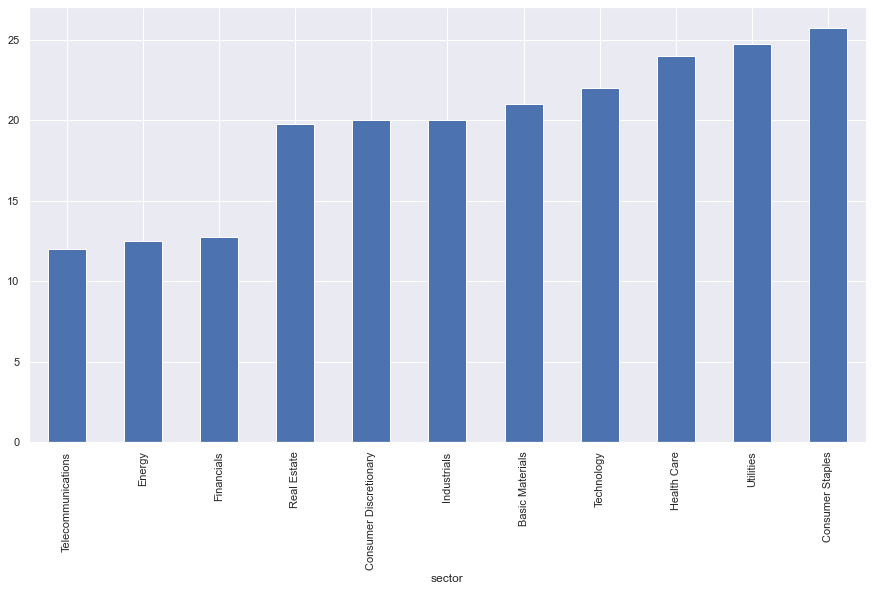

In [46]:
# Lower scores mean higher tax risk
df_sector_rank["combined_score"].sort_values().plot(figsize=(15,8), kind='bar')

# Chosen sector: Financials

Conclusion: Financials, Energy and Telecommunications seem most exposed to tax-risk. However Financials is by far a larger part of portfolio, and hence largest tax-risk for the portfolio will come from Financials. Notice in particular that Financials are very complex, and have the strongest link to 

In [47]:
df_financials = df.loc[df["sector"]=="Financials"]

In [48]:
df_financials.describe()

,organisation_code,mcap_nok,rev_nonincorp,rev_zt,subs_country_count,subs_count,avg_sector_subs_count,subs_zt,subs_zt_count,subs_zt_sector_avg,2020_etr,avg_etr_2016_2020,stdev_etr_2016_2020,delta_etr_2016_2020,sector_avg_etr_2016_2020,count_tax_controversy,zt_country
count,1.142000e+03,1.142000e+03,1083.000000,1083.000000,1137.000000,1137.000000,1.142000e+03,1142.000000,1142.000000,1.142000e+03,1085.000000,1085.000000,1085.000000,1085.000000,1.142000e+03,1142.000000,1142.000000
mean,9.821872e+06,1.408383e+11,26.187883,0.307091,9.675462,442.539138,4.525490e+02,0.415061,13.501751,1.408195e+01,18.432404,23.713364,34.012649,-7.670605,2.372083e+01,0.037653,0.139229
std,1.716267e+07,4.726260e+11,37.271098,3.414376,13.971212,1344.238225,4.151388e-12,0.492948,63.638409,2.896730e-13,70.102844,89.529221,211.656881,84.810462,1.563879e-13,0.260420,0.346337
min,1.000120e+05,5.528744e+07,0.000000,0.000000,1.000000,1.000000,4.525490e+02,0.000000,0.000000,1.408195e+01,-1064.062375,-688.429704,0.000000,-1093.345050,2.372083e+01,0.000000,0.000000
25%,1.193220e+05,1.096920e+10,0.000000,0.000000,1.000000,14.000000,4.525490e+02,0.000000,0.000000,1.408195e+01,13.910880,16.108003,2.449061,-11.029501,2.372083e+01,0.000000,0.000000
50%,3.320265e+05,2.935112e+10,0.721981,0.000000,4.000000,68.000000,4.525490e+02,0.000000,0.000000,1.408195e+01,21.081658,23.504295,6.213582,-2.215284,2.372083e+01,0.000000,0.000000
75%,1.128652e+07,9.295938e+10,45.041058,0.000000,11.000000,278.000000,4.525490e+02,1.000000,3.000000,1.408195e+01,28.160530,29.510583,12.911207,2.752916,2.372083e+01,0.000000,0.000000
max,6.963438e+07,1.008578e+13,100.000001,76.832289,107.000000,16919.000000,4.525490e+02,1.000000,940.000000,1.408195e+01,1317.064545,1769.776993,4284.265534,1315.425470,2.372083e+01,3.000000,1.000000


In [476]:
# Let's look at correlations

df_financials[['mcap_nok', 'rev_nonincorp', 'rev_zt', 'subs_country_count',
       'subs_count', 'subs_zt', 'subs_zt_count',
       '2020_etr', 'avg_etr_2016_2020',
       'stdev_etr_2016_2020', 'delta_etr_2016_2020',
       'count_tax_controversy']].corr()

,mcap_nok,rev_nonincorp,rev_zt,subs_country_count,subs_count,subs_zt,subs_zt_count,2020_etr,avg_etr_2016_2020,stdev_etr_2016_2020,delta_etr_2016_2020,count_tax_controversy
mcap_nok,1.00,0.10,-0.01,0.48,0.55,0.24,0.38,-0.06,-0.02,-0.01,-0.05,0.18
rev_nonincorp,0.10,1.00,0.10,0.34,0.09,0.31,0.14,-0.07,-0.01,0.04,-0.03,0.04
rev_zt,-0.01,0.10,1.00,0.02,-0.01,0.09,0.02,-0.01,0.22,0.21,0.00,-0.01
subs_country_count,0.48,0.34,0.02,1.00,0.61,0.50,0.47,-0.06,0.02,0.03,-0.07,0.27
subs_count,0.55,0.09,-0.01,0.61,1.00,0.30,0.56,-0.09,0.01,0.01,-0.09,0.24
subs_zt,0.24,0.31,0.09,0.50,0.30,1.00,0.25,-0.06,0.04,0.07,-0.05,0.08
subs_zt_count,0.38,0.14,0.02,0.47,0.56,0.25,1.00,-0.01,0.01,0.01,-0.00,0.19
2020_etr,-0.06,-0.07,-0.01,-0.06,-0.09,-0.06,-0.01,1.00,0.18,-0.04,0.83,0.00
avg_etr_2016_2020,-0.02,-0.01,0.22,0.02,0.01,0.04,0.01,0.18,1.00,0.59,0.08,0.01
stdev_etr_2016_2020,-0.01,0.04,0.21,0.03,0.01,0.07,0.01,-0.04,0.59,1.00,-0.05,-0.00


<AxesSubplot:xlabel='subsector'>

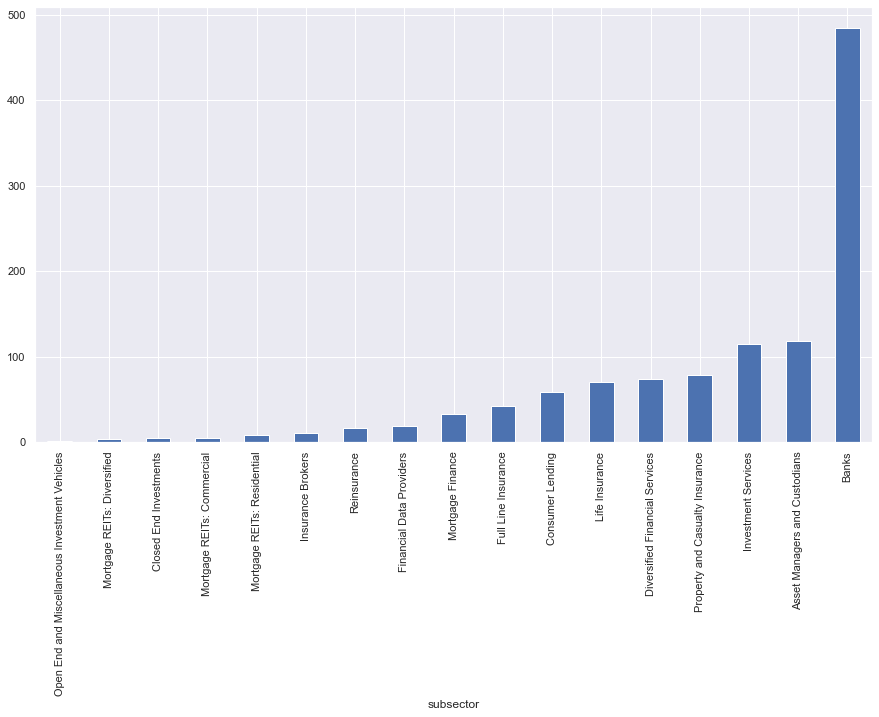

In [485]:
# Looking at the number of companies within each subsector
df_financials.groupby("subsector").size().sort_values().plot(figsize=(15,8), kind='bar')

<AxesSubplot:xlabel='subsector'>

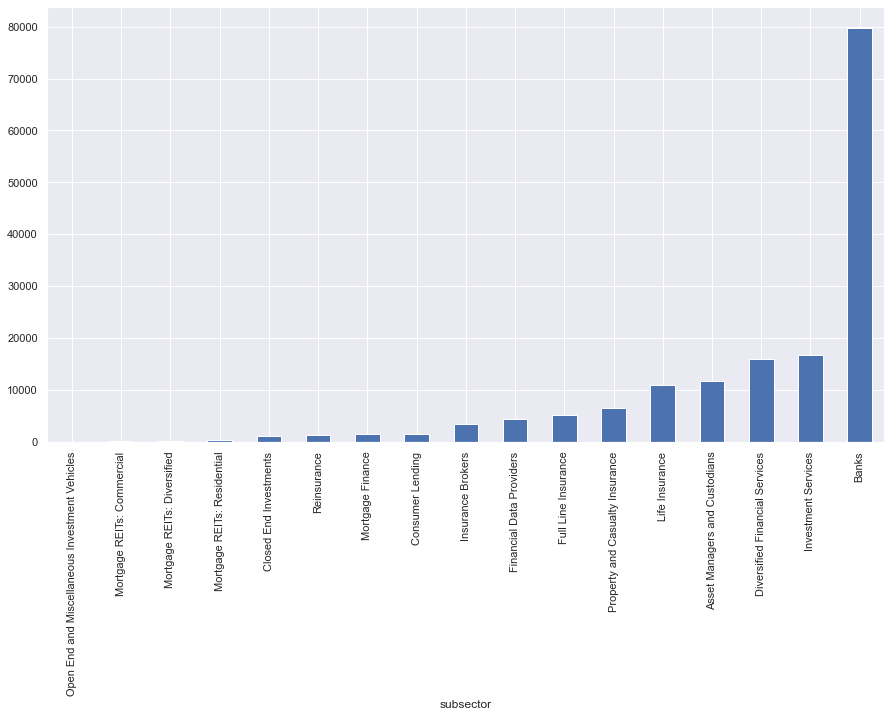

In [487]:
# Looking at the distribution of total market cap of each subsector in BNOK
df_financials["mcap_Bnok"] = (df_financials["mcap_nok"]/1000000000).round(2)
df_financials.groupby("subsector").mcap_Bnok.sum().sort_values().plot(figsize=(15,8), kind='bar')

### Market cap quintile break down
Market cap clearly plays a role when it comes to how complex a company is and to what degree it is multi-national, and thus increasing the chance of having a subsidiary in a zero-tax jurisdiction. In addition, larger companies usually have more publicity, and hence increasing the chance of there being a media controversy around the company. When it comes to the efficient tax rate, it is not immediate clear that larger companies should have lower, declining or volatile efficient tax rates. However, one could posit that larger companies have more resources, and can hence afford to set up a more complicated structure, views it self as "too big to fail", or even that it has calculated that it will be able to withstand a law suit or be able to quickly adapt to changes in rules and regulations.

One could also argue that larger companies with a high degree of multi-nationality have "more legs to stand on", i.e. are more diversified, and can overcome changes in tax laws in one region by shifting business to other regions.

In [156]:
df_financials_mcap_sorted = df_financials.sort_values("mcap_nok").reset_index(drop=True)
df_financials["mcap_quintlies"] = pd.cut(df_financials["mcap_nok"], bins = list(df_financials["mcap_nok"].quantile([i/5 for i in range(6)])), labels=[str(i+1) for i in range(5)])

In [231]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)


# Code to compare smallest and largest quintiles by market cap
df_financials_mcap_quintlies = df_financials.groupby("mcap_quintlies").mean().drop(["mcap_nok", "organisation_code", "avg_sector_subs_count", "subs_zt_sector_avg", "sector_avg_etr_2016_2020"], axis=1)

df_financials_mcap_quintlies = df_financials_mcap_quintlies.reset_index(drop=True)
df_financials_mcap_quintlies.index = [i+1 for i in range(5)]
df_financials_mcap_quintlies["mcap_quintlies"] = [i+1 for i in range(5)]

df_financials_mcap_quintlies.loc["correlations"] = list(df_financials_mcap_quintlies.corr()["mcap_quintlies"])

df_financials_mcap_quintlies_1_5 = df_financials_mcap_quintlies.drop(["mcap_quintlies"],axis = 1).transpose().drop([2,3,4], axis=1)


df_financials_mcap_quintlies_1_5.columns = ["1st", "5th", "Correlations"]

df_financials_mcap_quintlies_1_5.index = ['Revs not in country of corp', 'Revs from zt jur', 'N countries with subs', 'N subs',
       'Has a subs in a zt jur', 'Subs in a zt jur', 'ETR in 2020', 'Avg ETR 2016-2020',
       'Stdev ETR 2016-2020', 'Delta ETR 2016-2020', 'N tax controversies',
       'Country of corp in zt jur']
df_financials_mcap_quintlies_1_5.index.name = "Market Cap Quintiles"

df_financials_mcap_quintlies_1_5

,1st,5th,Correlations
Market Cap Quintiles,,,
Revs not in country of corp,19.85,41.90,0.87
Revs from zt jur,0.09,0.31,0.11
N countries with subs,2.58,25.29,0.87
N subs,35.11,1527.43,0.82
Has a subs in a zt jur,0.13,0.79,0.97
Subs in a zt jur,2.26,49.65,0.78
ETR in 2020,23.67,8.85,-0.71
Avg ETR 2016-2020,18.52,20.02,-0.15
Stdev ETR 2016-2020,32.66,29.10,-0.47


Comparing market cap quintiles with the complexity in terms of number of subsidiaries.

<AxesSubplot:xlabel='Mcap Quantiles', ylabel='Subs per country'>

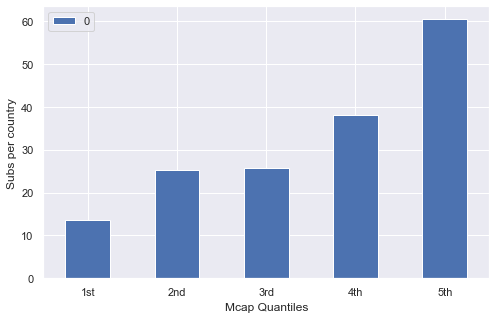

In [244]:
df_financials_mcap_quintlies_5 = df_financials_mcap_quintlies[:5]
df_financials_mcap_quintlies_5.index = ["1st", "2nd", "3rd", "4th", "5th"]

pd.DataFrame(df_financials_mcap_quintlies_5["subs_count"]/df_financials_mcap_quintlies_5["subs_country_count"]).plot(kind='bar',legend="a/b", xlabel="Mcap Quantiles", ylabel = "Subs per country", rot=0)

<AxesSubplot:xlabel='Mcap Quantiles', ylabel='Has a subs in a zt jur'>

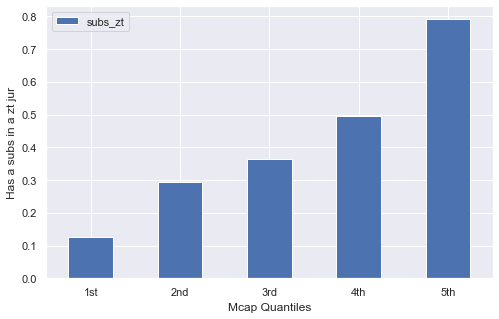

In [243]:
sns.set(rc={'figure.figsize':(8,5)})

df_financials_mcap_quintlies_5["subs_zt"].plot(kind='bar',legend="subs_zt", xlabel="Mcap Quantiles", ylabel = 'Has a subs in a zt jur', rot=0)

<AxesSubplot:xlabel='Mcap Quantiles', ylabel='pct'>

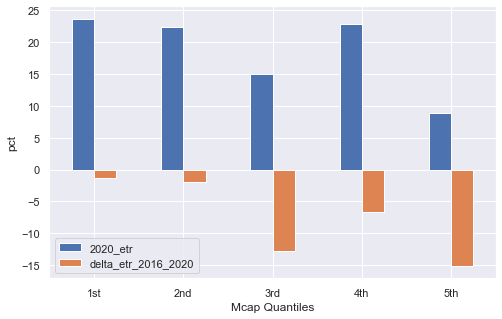

In [239]:
sns.set(rc={'figure.figsize':(8,5)})

df_financials_mcap_quintlies_5[["2020_etr", 'delta_etr_2016_2020']].plot(kind='bar', legend = ["a", "b"], xlabel="Mcap Quantiles", ylabel = 'pct', rot=0)

<AxesSubplot:xlabel='Mcap Quantiles', ylabel='Avg N tax controversies'>

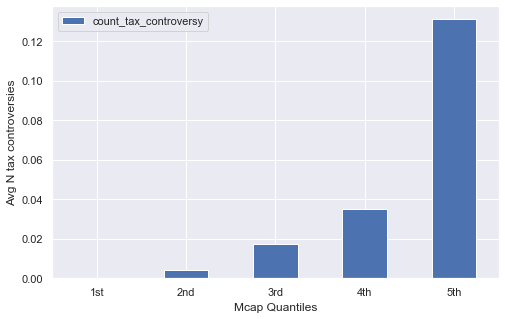

In [241]:
sns.set(rc={'figure.figsize':(8,5)})

df_financials_mcap_quintlies_5[['count_tax_controversy']].plot(kind='bar', xlabel="Mcap Quantiles", ylabel = 'Avg N tax controversies', rot=0)

<AxesSubplot:xlabel='Mcap Quantiles', ylabel='Avg N tax controversies'>

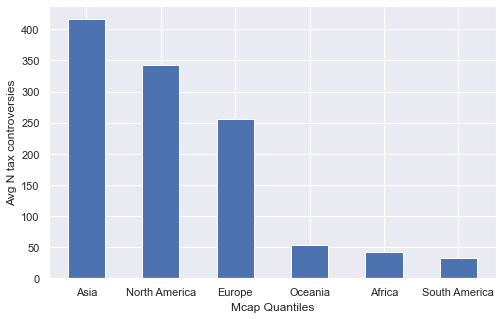

In [247]:
df_financials.Continent.value_counts().plot(kind='bar', xlabel="Mcap Quantiles", ylabel = 'Avg N tax controversies', rot=0)

## Looking more into geographical break down for Financials

In [478]:
df_financials.Continent.value_counts()

Asia             416
North America    342
Europe           256
Oceania           53
Africa            42
South America     33
Name: Continent, dtype: int64

<AxesSubplot:xlabel='Continent'>

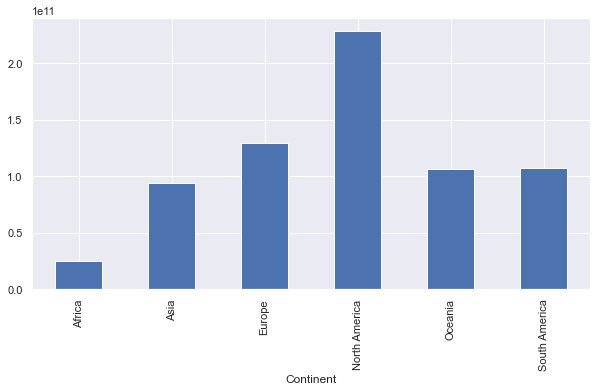

In [479]:
df_financials.groupby("Continent").mcap_nok.mean().plot.bar()

<AxesSubplot:>

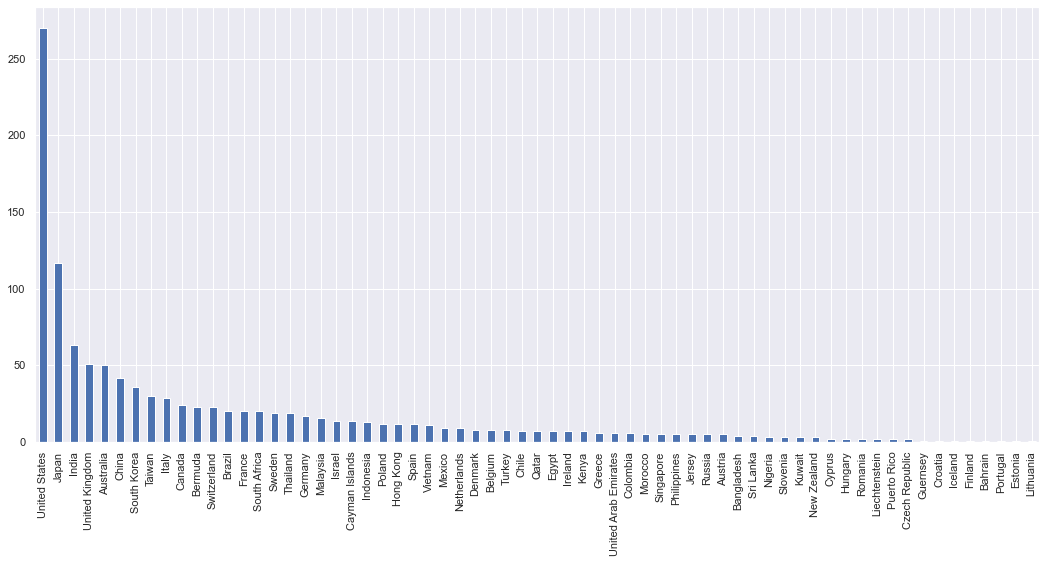

In [480]:
df_financials.country_of_incorporation.value_counts().plot(figsize=(18,8),kind='bar')

<AxesSubplot:xlabel='Continent', ylabel='Median number of subs per country'>

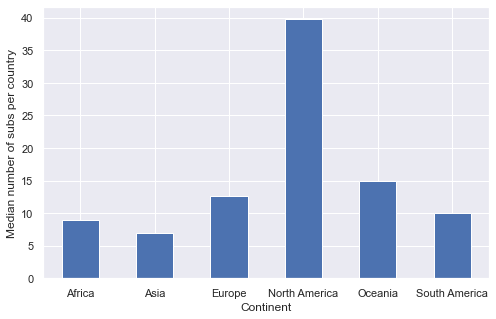

In [318]:
df_financials["subs_per_country"] = df_financials["subs_count"]/df_financials["subs_country_count"]
df_financials.groupby("Continent")["subs_per_country"].median().plot(kind='bar', ylabel = 'Median number of subs per country', rot=0)

<AxesSubplot:xlabel='Continent', ylabel='Pct'>

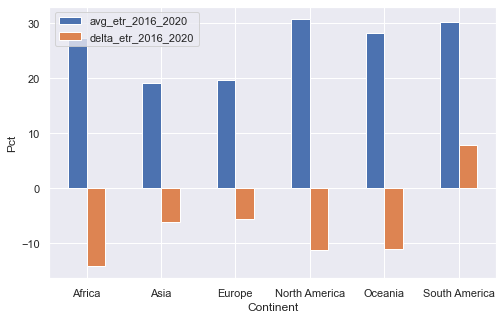

In [324]:
df_financials.groupby("Continent")[["avg_etr_2016_2020", "delta_etr_2016_2020"]].mean().plot(kind='bar', ylabel = 'Pct', rot=0)

<AxesSubplot:xlabel='Continent', ylabel='Median number of  zt subs'>

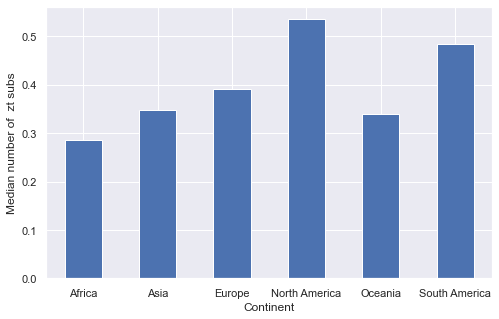

In [315]:
df_financials.groupby("Continent")["subs_zt"].mean().plot(kind='bar', ylabel = 'Median number of  zt subs', rot=0)

In [488]:
(df_financials.groupby("Continent")["mcap_Bnok"]).describe().transpose()

Continent,Africa,Asia,Europe,North America,Oceania,South America
count,42.00,416.00,256.00,342.00,53.00,33.00
mean,25.33,94.50,129.01,228.85,106.26,107.14
std,38.49,218.07,231.50,789.42,261.80,185.48
min,0.19,0.26,0.23,0.06,0.17,3.53
25%,3.77,7.38,13.22,17.52,6.09,12.33
50%,10.91,21.79,33.89,39.02,18.58,36.98
75%,26.50,73.65,129.20,132.18,66.01,78.88
max,187.38,1765.90,1874.43,10085.78,1426.97,880.79


subsector
Asset Managers and Custodians                     118
Banks                                             485
Closed End Investments                              5
Consumer Lending                                   58
Diversified Financial Services                     74
Financial Data Providers                           19
Full Line Insurance                                42
Insurance Brokers                                  11
Investment Services                               115
Life Insurance                                     70
Mortgage Finance                                   33
Mortgage REITs: Commercial                          5
Mortgage REITs: Diversified                         4
Mortgage REITs: Residential                         8
Open End and Miscellaneous Investment Vehicles      1
Property and Casualty Insurance                    78
Reinsurance                                        16
dtype: int64

# Peer group definition
Here there is a lot of improvement to be made. Clustering algorithm should be applied and optimized to detect clusters of companies. That, together with industry knowledge should be applied to determine the definition of peer groups. For simplicity's sake, I have chose to use sector and closes 99 companies by market cap as the peer groups. Notice that the peer group is company dependent, and does not partision the companies in the universe.

In [334]:
# An function that finds the closest n elements in a list l, where the element to compare with is at index i (x=l[i]).

def find_closest(n: int, l, i: int):
    x = l[i]
    shift_f = min(0, i - n//2)
    shift_b = max(0,(i + n//2 + n%2)-(len(l)-1))
    start = i - n//2 - shift_f - shift_b
    stop = i + n//2 + n%2 - shift_f - shift_b
    
    done_shift = False
    
    while not done_shift:
        if start > 0 and (abs(l[start-1] - x) < abs(l[stop] - x)):
            start -= 1
            stop -= 1
        elif stop < len(l)-1 and (abs(l[stop+1] - x) < abs(l[start] - x)):
            start += 1
            stop += 1
        else:
            done_shift = True
    
    return l[start:stop+1], start, stop

## Complexity score
The complexity score of a company is a measure of how complex the structure of the company is and hence a potential compliance risks associated with tax regulation. Defined as the rank within a peer group of the average number of subsidieries per country. 

In [335]:
mcap_sorted_list = list(df_financials[["mcap_nok","subs_per_country"]].sort_values("mcap_nok").mcap_nok)
subs_per_country_sorted_by_mcap_list = list(df_financials[["mcap_nok","subs_per_country"]].sort_values("mcap_nok").subs_per_country)

complexity_score = []

for i, el in enumerate(subs_per_country_sorted_by_mcap_list):
    start, stop = find_closest(n=99, l=mcap_sorted_list, i=i)[1:3]
    subs_per_country_sorted_by_mcap_list_i = subs_per_country_sorted_by_mcap_list[start:stop+1]
    subs_per_country_sorted_by_mcap_list_i.sort()
    complexity_score.append(subs_per_country_sorted_by_mcap_list_i.index(el)+1)

In [344]:
df_financials = df_financials.sort_values("mcap_nok")
df_financials["complexity_score"] = complexity_score

## ZT link
The ZT link score of a company is a measure of how close the company is linked to a zero-tax jurisdiction, both with respect to revenues and subsidiaries located in. This is an indicator that the company is vulnerable to changes in tax regulations in those jurisdictions, and also a potential for reputation damage, both for the company and the pension fund as a whole.

Here the ZT link score is defined as the rank within a peer group of the normalized zt revenues (divided by sector average) plus subs_zt (1 if the company has a subsidiary in a zero-tax jurisdiction, and 0 otherwise). 

In [346]:
df_financials["ZT_link"] = df_financials['rev_zt']/df_financials.rev_zt.mean()+df_financials["subs_zt"]

mcap_sorted_list = list(df_financials.index)
ZT_link_sorted_by_mcap_list = list(df_financials.ZT_link.fillna(0))


ZT_link_score = []

for i, el in enumerate(ZT_link_sorted_by_mcap_list):
    start, stop = find_closest(n=99, l=mcap_sorted_list, i=i)[1:3]
    ZT_link_sorted_by_mcap_list_i = ZT_link_sorted_by_mcap_list[start:stop+1]
    ZT_link_sorted_by_mcap_list_i.sort()
    ZT_link_score.append(ZT_link_sorted_by_mcap_list_i.index(el)+1)
    
df_financials["ZT_link_score"] = ZT_link_score

## ETR indicator
The efficient tax rate and its movements over time may tell us something about whether a company is practicing tax avoidance, which in turn may pose a risk. In particular, comparing with corporate tax rates of jurisdictions where the company earns revenues (data not available in this case), but also comparing efficient tax rate time-series with peers iis usefull.

Negative effective tax rates mean that the company received tax benefits or deferred taxes (often because of losses), and does not necessarily tell us much about the tax risk at the current time. The same goes for companies with efficient tax rate well above 100%. These will be treated as nulls (no info) and will excluded in a wighted average.

The definition of the ETR indicator (ETR_score) will simply be the average of ranks within peer groups of the following factors:
1. avg_etr_2016_2020
2. stdev_etr_2016_2020
3. delta_etr_2016_2020

In [360]:
# To determine if we will include the avg_etr_2016_2020_score or not
df_financials["avg_etr_2016_2020_weight"] = [1 if x>0 or x<100 else 0 for x in list(df_financials.avg_etr_2016_2020)]

In [406]:
avg_etr_2016_2020_sorted_by_mcap_list = list(df_financials.avg_etr_2016_2020.fillna(0))


avg_etr_2016_2020_score = []

for i, el in enumerate(avg_etr_2016_2020_sorted_by_mcap_list):
    start, stop = find_closest(n=99, l=mcap_sorted_list, i=i)[1:3]
    avg_etr_2016_2020_sorted_by_mcap_list_i = avg_etr_2016_2020_sorted_by_mcap_list[start:stop+1]
    avg_etr_2016_2020_sorted_by_mcap_list_i.sort()
    avg_etr_2016_2020_score.append(100-avg_etr_2016_2020_sorted_by_mcap_list_i.index(el))

df_financials["avg_etr_2016_2020_score"] = avg_etr_2016_2020_score

In [407]:
stdev_etr_2016_2020_sorted_by_mcap_list = list(df_financials.stdev_etr_2016_2020.fillna(0))

stdev_etr_2016_2020_score = []

for i, el in enumerate(stdev_etr_2016_2020_sorted_by_mcap_list):
    start, stop = find_closest(n=99, l=mcap_sorted_list, i=i)[1:3]
    stdev_etr_2016_2020_sorted_by_mcap_list_i = stdev_etr_2016_2020_sorted_by_mcap_list[start:stop+1]
    stdev_etr_2016_2020_sorted_by_mcap_list_i.sort()
    stdev_etr_2016_2020_score.append(100-stdev_etr_2016_2020_sorted_by_mcap_list_i.index(el))

df_financials["stdev_etr_2016_2020_score"] = stdev_etr_2016_2020_score

In [408]:
delta_etr_2016_2020_sorted_by_mcap_list = list(df_financials.delta_etr_2016_2020.fillna(0))

delta_etr_2016_2020_score = []

for i, el in enumerate(delta_etr_2016_2020_sorted_by_mcap_list):
    start, stop = find_closest(n=99, l=mcap_sorted_list, i=i)[1:3]
    delta_etr_2016_2020_sorted_by_mcap_list_i = delta_etr_2016_2020_sorted_by_mcap_list[start:stop+1]
    delta_etr_2016_2020_sorted_by_mcap_list_i.sort()
    delta_etr_2016_2020_score.append(delta_etr_2016_2020_sorted_by_mcap_list_i.index(el)+1)

df_financials["delta_etr_2016_2020_score"] = delta_etr_2016_2020_score

We take the average of avg_etr_2016_2020_score (excluded when approperiate), stdev_etr_2016_2020_score and delta_etr_2016_2020_score:

In [409]:
df_financials["ETR_score"] = (df_financials["avg_etr_2016_2020_score"]*df_financials["avg_etr_2016_2020_weight"]+df_financials["stdev_etr_2016_2020_score"]+df_financials["del_etr_2016_2020_score"])/(df_financials["avg_etr_2016_2020_weight"]+2)

In [411]:
df_financials.groupby('mcap_quintlies').ETR_score.mean()

mcap_quintlies
1   52.10
2   50.35
3   51.04
4   50.12
5   50.37
Name: ETR_score, dtype: float64

## Reputation - Controversy Score
Here we simply use count_tax_controversy as a proxy for the reputation of the company. Only a few companies actually have a non zero value here, and hence most companies will rank as 1 and the rist will have very high ranks. Thus we will weight this factor less.

In [412]:
count_tax_controversy_sorted_by_mcap_list = list(df_financials.count_tax_controversy)

count_tax_controversy_score = []

for i, el in enumerate(count_tax_controversy_sorted_by_mcap_list):
    start, stop = find_closest(n=99, l=mcap_sorted_list, i=i)[1:3]
    count_tax_controversy_sorted_by_mcap_list_i = count_tax_controversy_sorted_by_mcap_list[start:stop+1]
    count_tax_controversy_sorted_by_mcap_list_i.sort()
    count_tax_controversy_score.append(count_tax_controversy_sorted_by_mcap_list_i.index(el)+1)

df_financials["controversy_score"] = count_tax_controversy_score

In [413]:
df_financials.groupby('mcap_quintlies').controversy_score.mean()

mcap_quintlies
1   1.00
2   1.43
3   1.87
4   2.72
5   9.96
Name: controversy_score, dtype: float64

# Tax Risk definition
We now take a weighted average of the scores constructed above. We only give 0.5 weight to the controversy score, as ranks will be infalted as explained above.

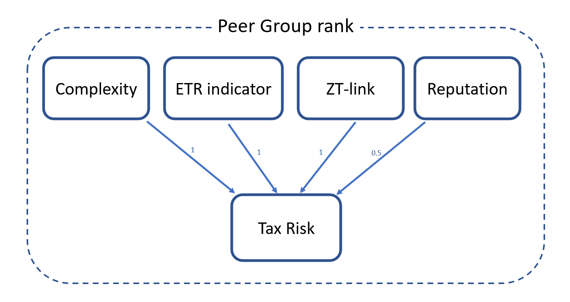

In [498]:
Image(filename='PeerGroup.PNG')

In [414]:
df_financials["tax_risk"] = (df_financials["complexity_score"]+df_financials["ZT_link_score"]+df_financials["ETR_score"]+0.5*df_financials["controversy_score"])/3.5

<AxesSubplot:xlabel='subsector', ylabel='Tax Risk'>

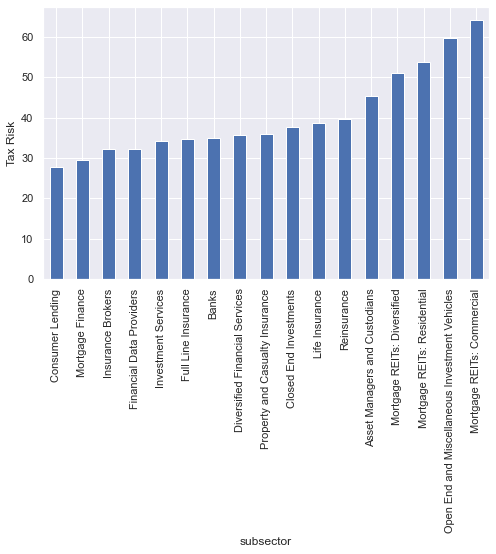

In [439]:
# Looking at how tax risk varies across subsectors
df_financials.groupby('subsector').tax_risk.mean().sort_values().plot(figsize=(8,5), kind='bar', ylabel = "Tax Risk")

In [491]:
# Lets see how the averages of different factors are for the five different quintiles of companies ranked by tax risk

df_financials["tax_risk_quintiles"] = pd.cut(df_financials["tax_risk"], bins = list(df_financials["tax_risk"].quantile([i/5 for i in range(6)])), labels=[str(i+1) for i in range(5)])
df_financials.groupby("tax_risk_quintiles").mean()[["mcap_Bnok", "rev_zt", "subs_count", 
                                                    "subs_zt", "avg_etr_2016_2020", 
                                                    "count_tax_controversy", "tax_risk"]].transpose()

tax_risk_quintiles,1,2,3,4,5
mcap_Bnok,73.24,115.02,111.74,191.00,214.78
rev_zt,0.00,0.00,0.00,0.13,1.35
subs_count,53.67,82.42,311.19,717.24,1046.49
subs_zt,0.07,0.19,0.31,0.62,0.89
avg_etr_2016_2020,30.99,17.69,23.62,25.89,18.53
count_tax_controversy,0.02,0.02,0.04,0.02,0.09
tax_risk,17.47,28.14,35.37,42.86,57.04


<AxesSubplot:xlabel='Continent', ylabel='Tax Risk'>

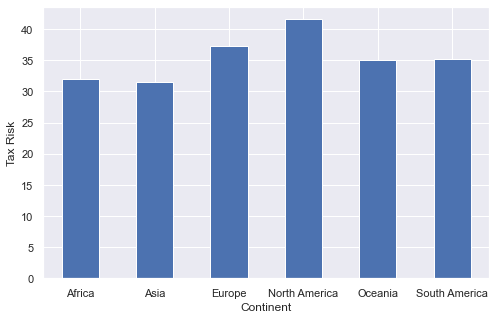

In [436]:
# Average tax risk across continents

sns.set(rc={'figure.figsize':(10,5)})
df_financials.groupby("Continent").tax_risk.mean().plot(figsize=(8,5), kind='bar', ylabel = "Tax Risk", rot=0)

<AxesSubplot:xlabel='mcap_quintlies', ylabel='Tax Risk'>

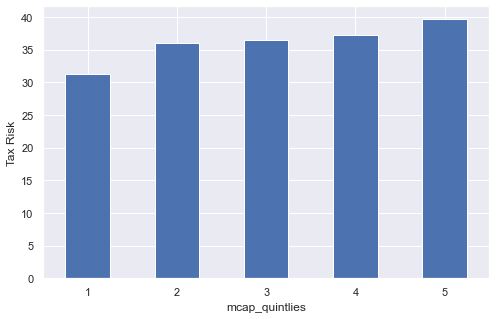

In [441]:
# Average tax risk across quintiles of market cap
df_financials.groupby('mcap_quintlies').tax_risk.mean().plot(figsize=(8,5), kind='bar', ylabel = "Tax Risk", rot=0)

### Hishest vs Lowest risk according to the tax risk score

In [490]:
df_highest_risk = df_financials[['country_of_incorporation', 'subsector',
       'mcap_Bnok', 'rev_nonincorp', 'rev_zt', 'subs_country_count',
       'subs_count', 'subs_per_country','subs_zt', 'subs_zt_count',
        '2020_etr', 'avg_etr_2016_2020',
       'stdev_etr_2016_2020', 'delta_etr_2016_2020',
       'count_tax_controversy', 
       'complexity_score', 
       'ZT_link_score', 'ETR_score',
       'controversy_score', 'tax_risk']].sort_values("tax_risk", ascending=False).head(1).transpose()

df_lowest_risk = df_financials[['country_of_incorporation', 'subsector',
       'mcap_Bnok', 'rev_nonincorp', 'rev_zt', 'subs_country_count',
       'subs_count', 'subs_per_country','subs_zt', 'subs_zt_count',
        '2020_etr', 'avg_etr_2016_2020',
       'stdev_etr_2016_2020', 'delta_etr_2016_2020',
       'count_tax_controversy', 
       'complexity_score', 
       'ZT_link_score', 'ETR_score',
       'controversy_score', 'tax_risk']].sort_values("tax_risk", ascending=False).tail(1).transpose()

df_best_and_worst = df_highest_risk.join(df_lowest_risk)

df_best_and_worst.columns = ["Highest Tax Risk", "Lowest Tax Risk"]

df_best_and_worst

,Highest Tax Risk,Lowest Tax Risk
country_of_incorporation,Liechtenstein,Italy
subsector,Banks,Asset Managers and Custodians
mcap_Bnok,15.89,3.58
rev_nonincorp,39.59,0.00
rev_zt,0.00,0.00
subs_country_count,9.00,1.00
subs_count,910.00,3.00
subs_per_country,101.11,3.00
subs_zt,1,0
subs_zt_count,2,0


## Further explorations
Work on better definitions of peer groups and weights for risk factors is needed.

In [489]:
# Clustering algorithm to find peer groups

from sklearn.cluster import KMeans
k = 10
kmeans = KMeans(n_clusters=k)
y_pred = kmeans.fit_predict(df[['mcap_nok', 'rev_nonincorp', 'rev_zt', 'subs_country_count',
       'subs_count', 'avg_sector_subs_count', 'subs_zt', 'subs_zt_count',
       'subs_zt_sector_avg', '2020_etr', 'avg_etr_2016_2020',
       'stdev_etr_2016_2020', 'delta_etr_2016_2020',
       'sector_avg_etr_2016_2020', 'count_tax_controversy', 'zt_country']].dropna())

kmeans.score(df[['mcap_nok', 'rev_nonincorp', 'rev_zt', 'subs_country_count',
       'subs_count', 'avg_sector_subs_count', 'subs_zt', 'subs_zt_count',
       'subs_zt_sector_avg', '2020_etr', 'avg_etr_2016_2020',
       'stdev_etr_2016_2020', 'delta_etr_2016_2020',
       'sector_avg_etr_2016_2020', 'count_tax_controversy', 'zt_country']].dropna())

pd.Series(y_pred)#.value_counts()

df_nona = df.dropna()
df_nona["10_cluster"] = pd.Series(y_pred)

df_nona.tail(25)

<ipython-input-489-5b73df5a24f6>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nona["10_cluster"] = pd.Series(y_pred)


,organisation_code,country_of_incorporation,sector,subsector,mcap_nok,rev_nonincorp,rev_zt,subs_country_count,subs_count,avg_sector_subs_count,...,2020_etr,avg_etr_2016_2020,stdev_etr_2016_2020,delta_etr_2016_2020,sector_avg_etr_2016_2020,count_tax_controversy,Continent,Country,zt_country,10_cluster
9224,183906,Sri Lanka,Financials,Banks,2579268764.85,0.00,0.00,2.00,9.00,452.55,...,28.99,29.46,2.63,0.90,23.72,0.00,Asia,Sri Lanka,0,nan
9225,209071,Sri Lanka,Consumer Staples,Brewers,1975994496.78,2.22,0.00,2.00,2.00,66.35,...,35.92,33.82,6.62,6.25,28.47,0.00,Asia,Sri Lanka,0,nan
9226,8395854,Sri Lanka,Consumer Staples,Personal Products,2047967483.45,4.23,0.00,4.00,25.00,66.35,...,49.08,32.70,9.40,20.61,28.47,0.00,Asia,Sri Lanka,0,nan
9227,8406643,Sri Lanka,Telecommunications,Telecommunications Services,4159599875.35,0.00,0.00,2.00,15.00,103.18,...,12.95,15.64,3.68,-1.43,11.56,0.00,Asia,Sri Lanka,0,nan
9228,9191931,Sri Lanka,Consumer Discretionary,Hotels and Motels,777138288.38,73.92,0.00,3.00,5.00,79.78,...,8.08,15.62,5.37,-5.99,12.43,0.00,Asia,Sri Lanka,0,nan
9230,153968,Czech Republic,Financials,Banks,63644960016.42,0.00,0.00,4.00,34.00,452.55,...,19.78,18.05,1.32,2.99,23.72,0.00,Europe,Czech Republic,0,nan
9231,23464105,Czech Republic,Financials,Banks,18370991288.62,0.00,0.00,1.00,8.00,452.55,...,13.59,17.84,2.73,-6.09,23.72,0.00,Europe,Czech Republic,0,nan
9232,159043,Peru,Industrials,Machinery: Construction and Handling,3228179943.92,15.58,0.00,6.00,18.00,96.35,...,36.97,34.83,2.84,5.20,31.91,0.00,South America,Peru,0,nan
9233,171209,Peru,Consumer Staples,Food Products,10164197189.46,52.21,0.00,10.00,37.00,66.35,...,35.70,32.68,2.70,0.88,28.47,0.00,South America,Peru,0,nan
9234,219452,Peru,Consumer Discretionary,Publishing,376682876.81,0.00,0.00,5.00,21.00,79.78,...,0.84,40.15,27.12,-32.12,12.43,0.00,South America,Peru,0,nan
